## 1. Setup & Load Data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


In [3]:
# Load dataset
df = pd.read_csv("netflix_titles.csv")

In [4]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [6]:
df.shape

(8807, 12)

In [7]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

## 2. Data Cleaning

In [8]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [9]:
df.duplicated().sum()

np.int64(0)

In [10]:
df.drop_duplicates(inplace=True)


In [11]:
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

## 3. Data Overview

In [12]:
df['type'].value_counts()

type
Movie      6131
TV Show    2676
Name: count, dtype: int64

In [13]:
df['rating'].value_counts()

rating
TV-MA       3207
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
NC-17          3
UR             3
74 min         1
84 min         1
66 min         1
Name: count, dtype: int64

In [15]:
#df.describe(include='all')
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


## 5. Visualizations

C:\Users\n tech\AppData\Local\Temp\ipykernel_16288\4114552549.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='type', palette='Set2')


Text(0.5, 1.0, 'Distribution of Content Type')

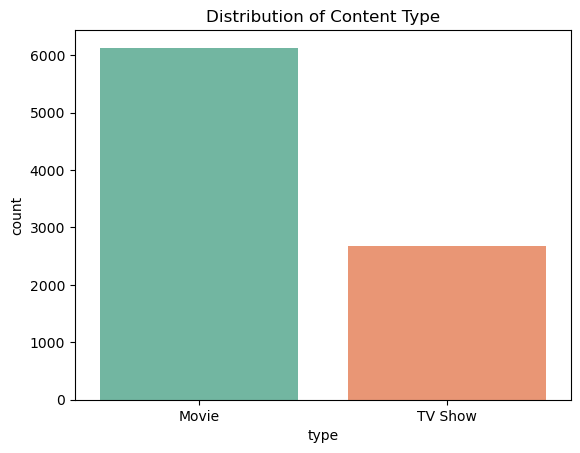

In [17]:
sns.countplot(data=df, x='type', palette='Set2')
plt.title("Distribution of Content Type")


In [20]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import plotly.express as px

# Settings
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

# Load data
df = pd.read_csv("netflix_titles.csv")

# Clean column names
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

# Convert 'date_added' to datetime (robust handling)
df['date_added'] = pd.to_datetime(df['date_added'], format='mixed', errors='coerce')

# Extract year and month
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month

# Optional: Check how many rows failed to convert
print("Unparsed dates (NaT):", df['date_added'].isna().sum())


Unparsed dates (NaT): 10


C:\Users\n tech\AppData\Local\Temp\ipykernel_16288\1623722778.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='type', data=df, palette='Set2')


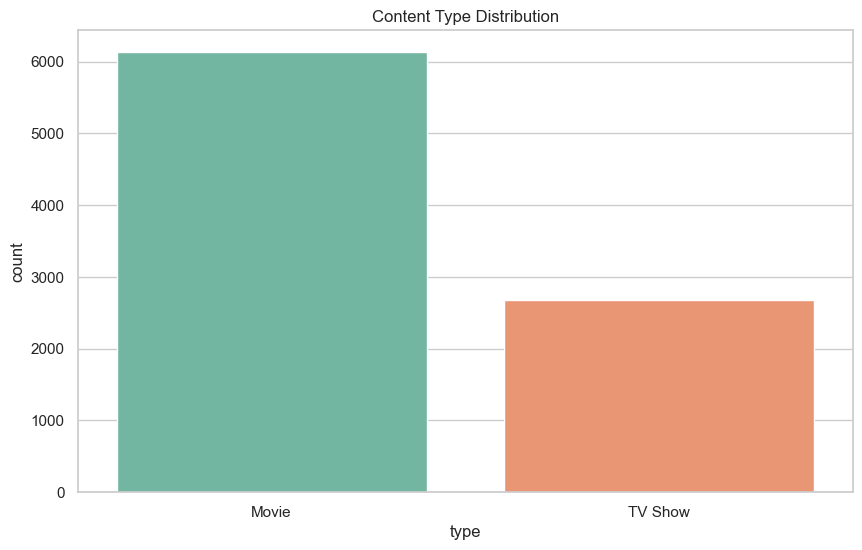

In [21]:
sns.countplot(x='type', data=df, palette='Set2')
plt.title("Content Type Distribution")
plt.show()


C:\Users\n tech\AppData\Local\Temp\ipykernel_16288\3331996986.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='rating', data=df, order=df['rating'].value_counts().index, palette='Set3')


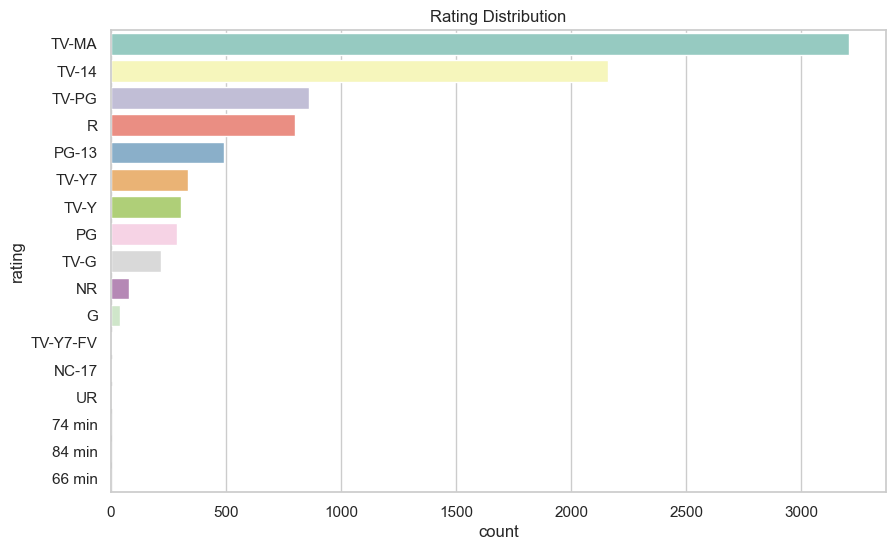

In [22]:
sns.countplot(y='rating', data=df, order=df['rating'].value_counts().index, palette='Set3')
plt.title("Rating Distribution")
plt.show()


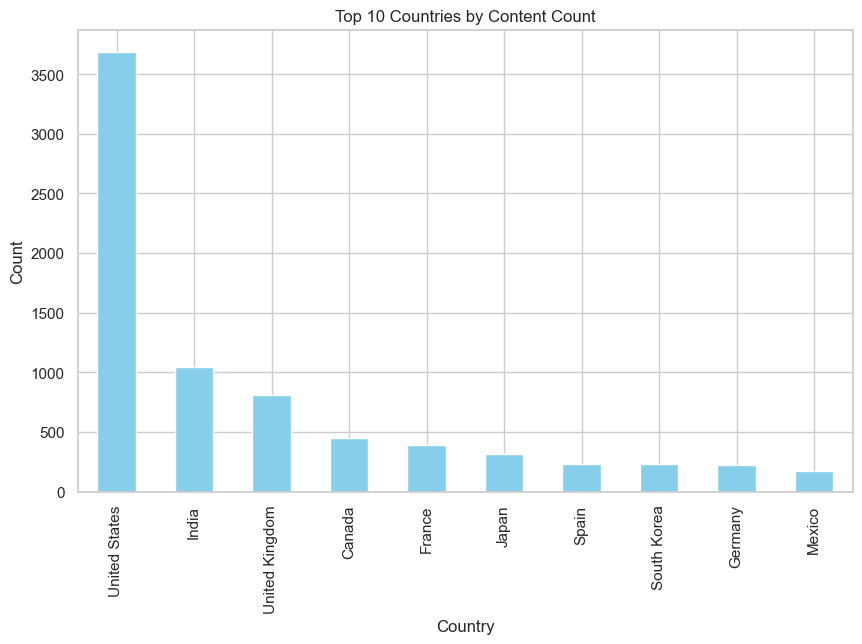

In [23]:
top_countries = df['country'].dropna().str.split(',').explode().str.strip().value_counts().head(10)
top_countries.plot(kind='bar', color='skyblue')
plt.title("Top 10 Countries by Content Count")
plt.xlabel("Country")
plt.ylabel("Count")
plt.show()


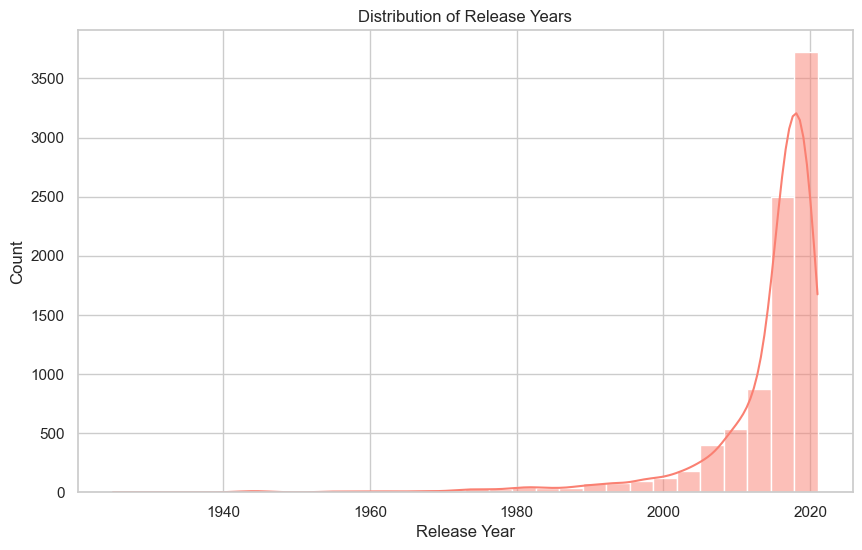

In [24]:
sns.histplot(df['release_year'], bins=30, kde=True, color='salmon')
plt.title("Distribution of Release Years")
plt.xlabel("Release Year")
plt.ylabel("Count")
plt.show()


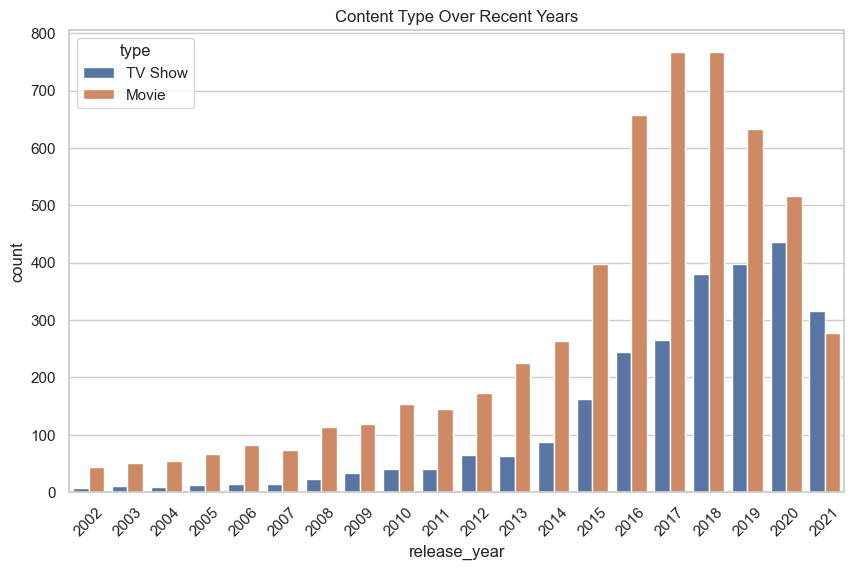

In [25]:
sns.countplot(data=df, x='release_year', hue='type', order=sorted(df['release_year'].unique())[-20:])
plt.xticks(rotation=45)
plt.title("Content Type Over Recent Years")
plt.show()


<>:2: SyntaxWarning: invalid escape sequence '\d'
<>:2: SyntaxWarning: invalid escape sequence '\d'
C:\Users\n tech\AppData\Local\Temp\ipykernel_16288\2785207418.py:2: SyntaxWarning: invalid escape sequence '\d'
  df['duration_minutes'] = df['duration'].str.extract('(\d+)').astype(float)


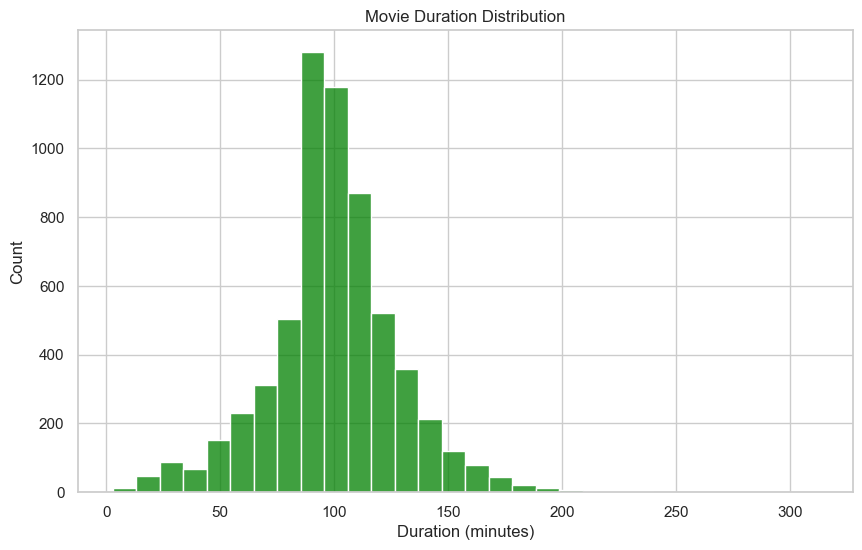

In [27]:
# Extract duration in minutes
df['duration_minutes'] = df['duration'].str.extract('(\d+)').astype(float)

sns.histplot(data=df[df['type'] == 'Movie'], x='duration_minutes', bins=30, color='green')
plt.title("Movie Duration Distribution")
plt.xlabel("Duration (minutes)")
plt.show()


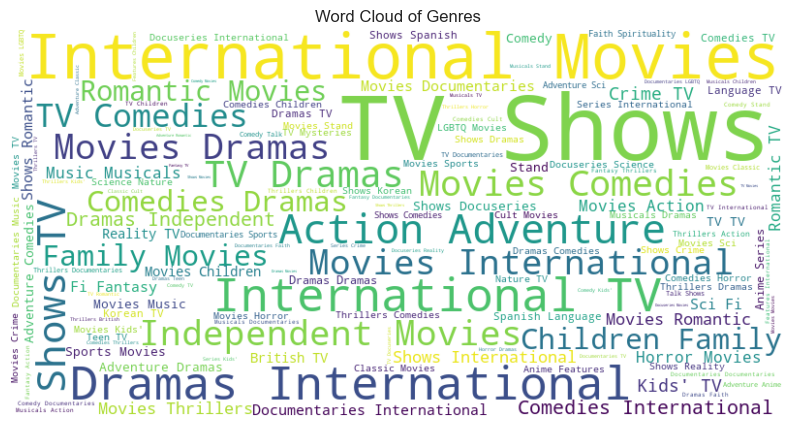

In [28]:
genres = ' '.join(df['listed_in'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(genres)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of Genres")
plt.show()


C:\Users\n tech\AppData\Local\Temp\ipykernel_16288\3876336600.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='type', y='release_year', data=df, palette='Pastel1')


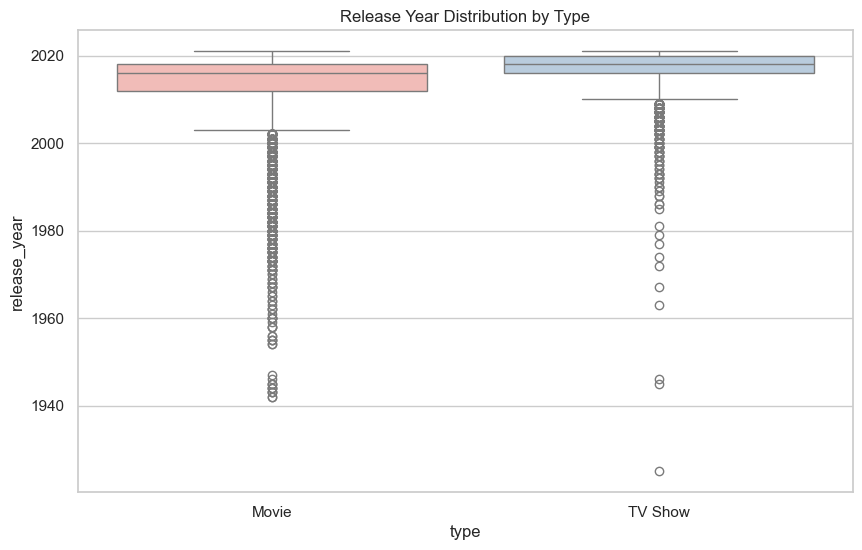

In [29]:
sns.boxplot(x='type', y='release_year', data=df, palette='Pastel1')
plt.title("Release Year Distribution by Type")
plt.show()


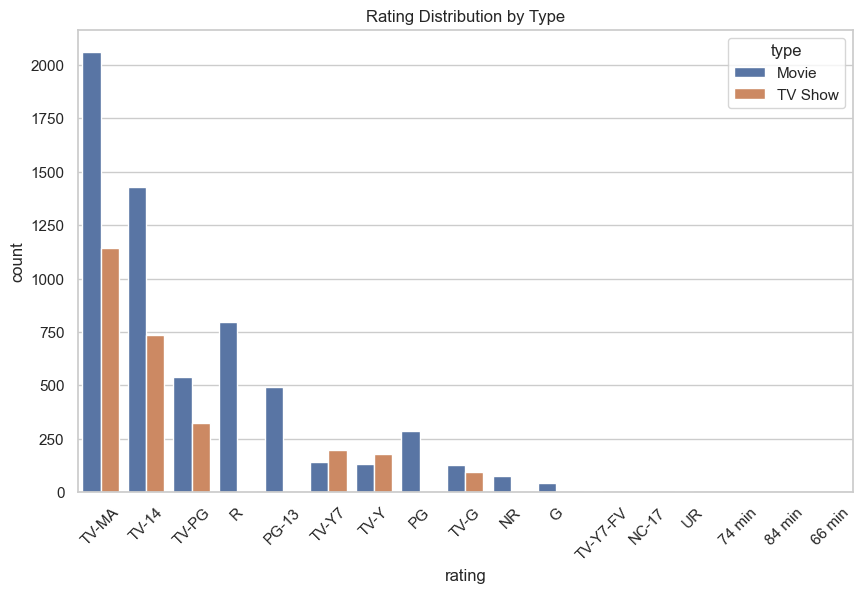

In [30]:
sns.countplot(data=df, x='rating', hue='type', order=df['rating'].value_counts().index)
plt.xticks(rotation=45)
plt.title("Rating Distribution by Type")
plt.show()


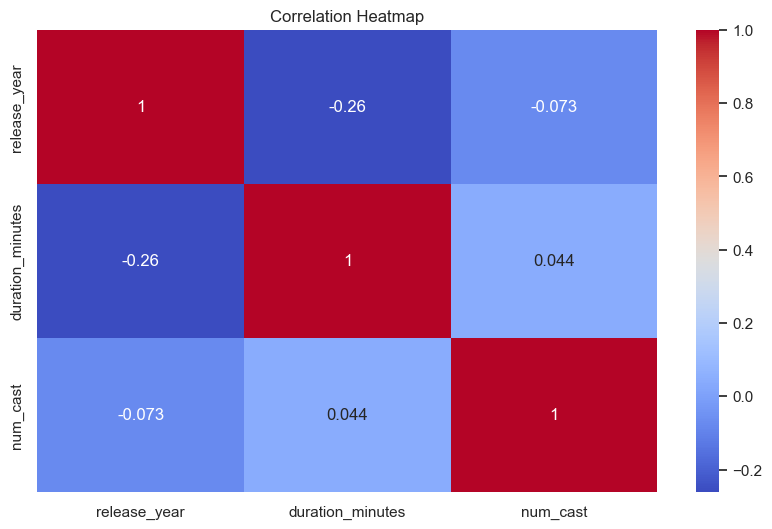

In [31]:
df['num_cast'] = df['cast'].dropna().apply(lambda x: len(x.split(',')))
numeric_df = df[['release_year', 'duration_minutes', 'num_cast']].dropna()

sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


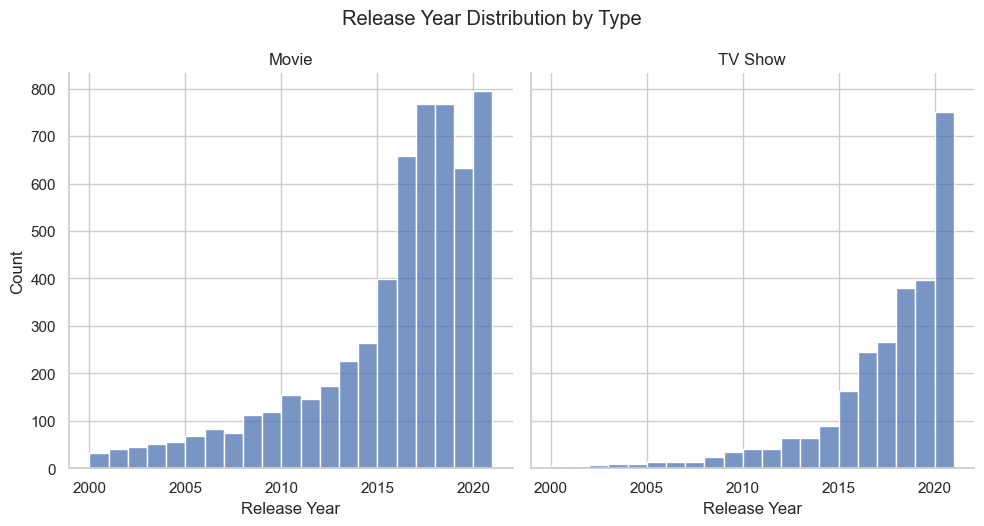

In [32]:
g = sns.FacetGrid(df[df['release_year'] >= 2000], col="type", height=5)
g.map_dataframe(sns.histplot, x="release_year", binwidth=1)
g.set_titles("{col_name}")
g.set_axis_labels("Release Year", "Count")
plt.suptitle("Release Year Distribution by Type", y=1.05)
plt.show()


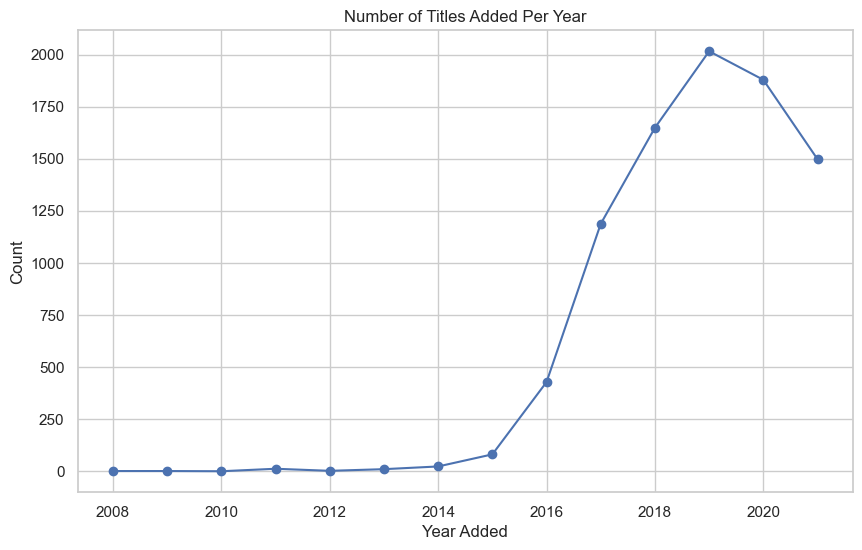

In [33]:
df_year = df['year_added'].value_counts().sort_index()
df_year.plot(kind='line', marker='o')
plt.title("Number of Titles Added Per Year")
plt.xlabel("Year Added")
plt.ylabel("Count")
plt.grid(True)
plt.show()


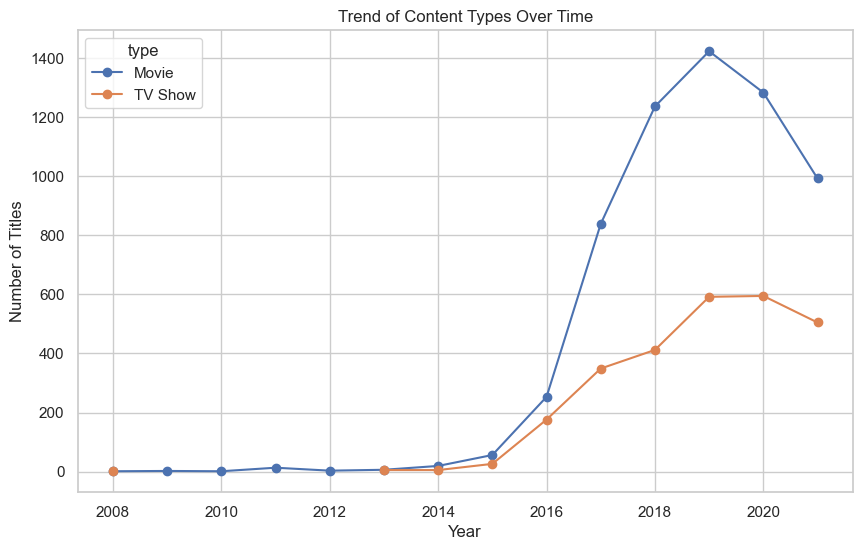

In [34]:
type_trend = df.groupby(['year_added', 'type']).size().unstack()
type_trend.plot(marker='o')
plt.title("Trend of Content Types Over Time")
plt.xlabel("Year")
plt.ylabel("Number of Titles")
plt.grid(True)
plt.show()


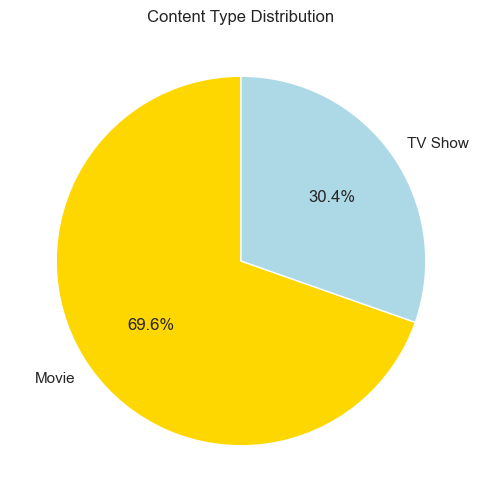

In [35]:
df['type'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=['gold', 'lightblue'])
plt.ylabel("")
plt.title("Content Type Distribution")
plt.show()


In [36]:
df_treemap = df.dropna(subset=['country', 'listed_in', 'type']).copy()
df_treemap = df_treemap.groupby(['country', 'listed_in', 'type']).size().reset_index(name='count')
fig = px.treemap(df_treemap, path=['country', 'listed_in', 'type'], values='count',
                 title="Treemap: Country > Genre > Type")
fig.show()
